In [11]:
import pandas as pd
import numpy as np

from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt

from src.plotting_functions import plot_value_counts

In [2]:
df = pd.read_csv("data/butterfly_mimics/images.csv")

Preliminary check to ensure that there is no missing data in the train set. 

In [3]:
df.isnull().sum()

image    0
name     0
stage    0
side     0
dtype: int64

### Data Overview

Train set contains 853 images, with the following features in the csv file:
- image: file name of the corresponding .jpg file
- Name: name of the butterfly species. This is also the **label**. There are 6 classes in this multi-class image classification problem
- stage: the lifecycle stage butterfly is in.  
- side: side of the butterfly where the photo is taken. There are 3 unique categories for this feature.

Few observations from the dataset:
- image types are all in .jpg format, so we won't have to account for more uncommon image file types. 
- All images have been given the "adult" category for the stage feature. Given that there is no variance in the lifecycle stage of the images, the 'stage' feature is likely inconsequential for our problem

In [4]:
df.shape

(853, 4)

### Target distribution
1. Biggest proportion (22.5%) of images belong to the 'pipevine' class, while 'spicebush' (12.7%) and 'viceroy' (12.8%) had the smallest proportions of images.
2. As there is some inbalance in the class distribution, it would be helpful to stratify on classes when we perform the train-val split during model training. This ensures that no class is over/under represented and that the original proportions of examples are kept.


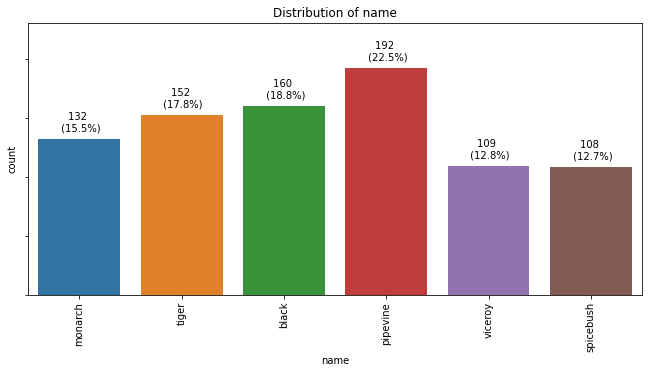

In [5]:
plot_value_counts(df = df, feature_x = "name")

### Side distribution
1. Dorsal had the highest proportion of images (53.9%), and ventral had the smallest proportion (21.9%)
2. As there is quite a bit of variation across the distribution, it could also be worthwhile to consider this feature during the splitting of data into train and validation sets. 

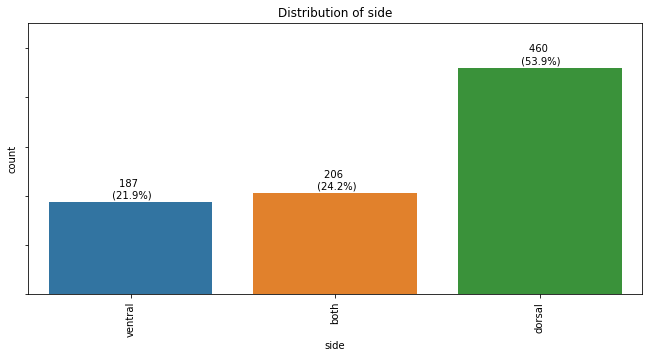

In [6]:
plot_value_counts(df = df, feature_x = "side")

### crosstab between name and side
- As expected, when segmented by classes, the most dominant side is often dorsal, with the exception of the monarch butterflies. For this class of butterflies, most of the images provided tend to be taken from the ventral side. 
- Given that there is variation in the sides of the photos conditional on class, this reinforces the notion that the train-validation split should take both features into account. Besides, the side feature should be an important feature in the model, as the same species of butterfly may look different depending on the side the photo is taken.  

In [10]:
pd.crosstab(df["name"], df["side"], normalize="index")

side,both,dorsal,ventral
name,,,
black,0.275000,0.637500,0.087500
monarch,0.151515,0.393939,0.454545
pipevine,0.343750,0.401042,0.255208
spicebush,0.333333,0.509259,0.157407
tiger,0.151316,0.743421,0.105263
viceroy,0.155963,0.559633,0.284404


### Data loading
- loading of image data into a dictionary, where key is the name of butterfly and value is the list of images (as PIL object)


In [25]:
imgs = {class_:[] for class_ in df["name"].unique()}

IMG_PREFIX = "data/butterfly_mimics/images/"

for idx, row in df.iterrows():
    img_path = IMG_PREFIX + row["image"] + ".jpg"
    class_ = row["name"]
    imgs[class_] += [Image.open(img_path)]


In [28]:
# check that all images have beens successfully read
{class_: len(images) for class_, images in imgs.items()}

{'monarch': 132,
 'tiger': 152,
 'black': 160,
 'pipevine': 192,
 'viceroy': 109,
 'spicebush': 108}

In [34]:
IMG_PREFIX = "data/butterfly_mimics/images/"

df["img_pil"] = df["image"].apply(lambda x: Image.open(IMG_PREFIX + x + ".jpg"))
    

In [41]:
df["img_height"] = df["img_pil"].apply(lambda x: x.size[0])
df["img_width"] = df["img_pil"].apply(lambda x: x.size[1])
df["img_size"] = df["img_height"].astype(str) + "x" + df["img_width"] .astype(str)

In [43]:
df["img_size"].value_counts()

224x224    850
224x235      1
256x224      1
238x224      1
Name: img_size, dtype: int64